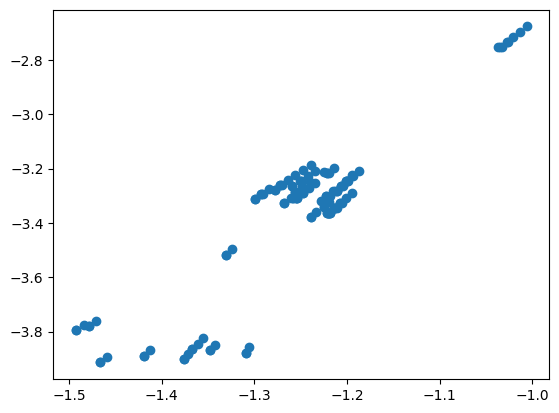

In [1]:
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import matplotlib.pyplot as plt
import seaborn as sns
from shower_sim_baseline import summary_metric


# from shower_sim_instrumented import make_simulator
from shower_sim_redone import  make_simulator
simulator = make_simulator()

from tqdm import tqdm
import numpy as np
from shower_sim_optimize import optimize, program_to_optimize

%load_ext autoreload
%autoreload 2


hits, active,*_ = simulator(2.5, split_prob = 1.0);
plt.scatter(active[:,0],active[:,1])


In [25]:
the_program = program_to_optimize(simulator, summary_metric, sim_kwargs=dict(reuse_rvs = True, split_prob = 0.0))
runs1 = [the_program(2.5, keep_all_grads=True) for _ in tqdm(range(5000))]

the_program = program_to_optimize(simulator, summary_metric, sim_kwargs=dict(reuse_rvs = True, split_prob = 1.0))
runs2 = [the_program(2.5, keep_all_grads=True) for _ in tqdm(range(5000))]

np.savez('runs',**{'gradients_eloss': runs1, 'gradients_shower': runs2})

  9%|▉         | 471/5000 [01:29<14:36,  5.17it/s]

In [12]:
data = np.load('runs.npz', allow_pickle=True)
data = dict(data)
runs_eloss = data['gradients_eloss']
runs_shower = data['gradients_shower']

stad 3.04085,10.64286
scorb 3.12272,6.90842
score 3.62732,17.22857
numeric 0.22787,145.29692
----
stad 3.04085,10.64286
scorb 3.12272,6.90842
score 3.62732,17.22857
numeric 0.22787,145.29692
----


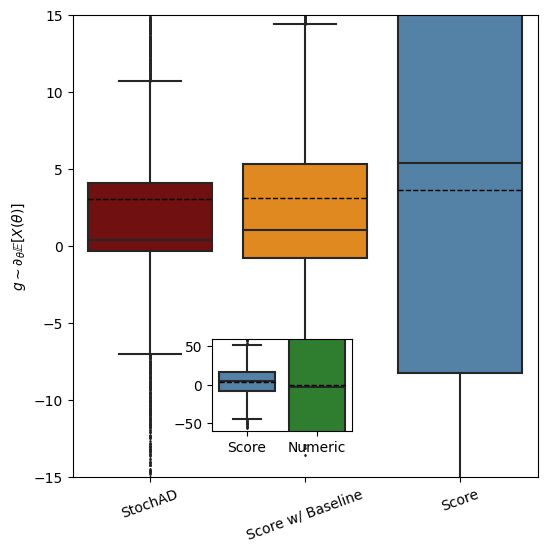

In [23]:
from plots_gradients import plot_variance_with_inset
f,axarr = plt.subplots(1,1)
f.set_size_inches(6,6)
plot_variance_with_inset(axarr,runs_eloss)
f.savefig('gradient_variance_eloss.pdf')

stad 2.48381,7.77911
scorb 2.61544,4.56569
score 2.55845,12.56244
numeric 2.43035,78.73653
----
stad 2.48381,7.77911
scorb 2.61544,4.56569
score 2.55845,12.56244
numeric 2.43035,78.73653
----


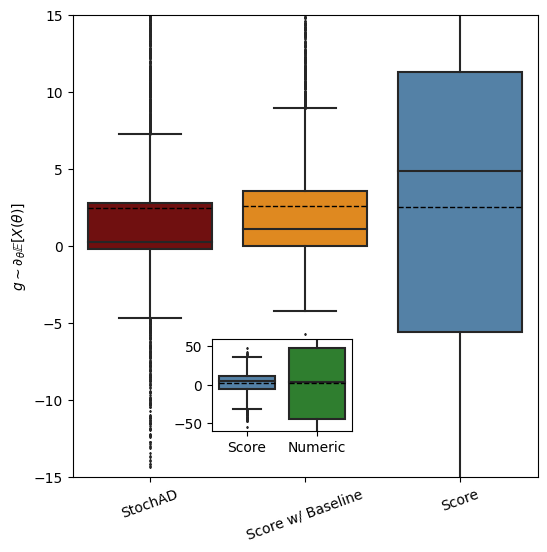

In [24]:
from plots_gradients import plot_variance_with_inset
f,axarr = plt.subplots(1,1)
f.set_size_inches(6,6)
plot_variance_with_inset(axarr,runs_shower)
f.savefig('gradient_variance_shower.pdf')